In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Data loading and Understanding

In [2]:
df = pd.read_csv("archive (2).zip")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.shape 

(10000, 12)

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [7]:
#printing the unique values in all the columns

df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
for col in df.columns:
    print(col, df[col].unique())

customer_id [15634602 15647311 15619304 ... 15584532 15682355 15628319]
credit_score [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 61

In [9]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["country"].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df["gender"].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df["churn"].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

# Data visualization and Preprocessing

<Axes: xlabel='churn', ylabel='count'>

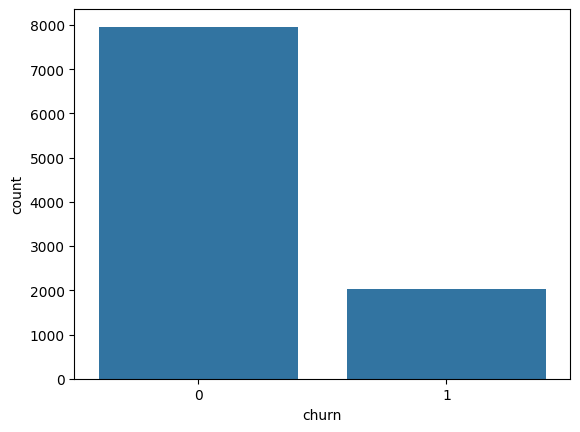

In [14]:
#distribution of churn

sns.countplot(x='churn', data=df)

<Axes: xlabel='gender', ylabel='count'>

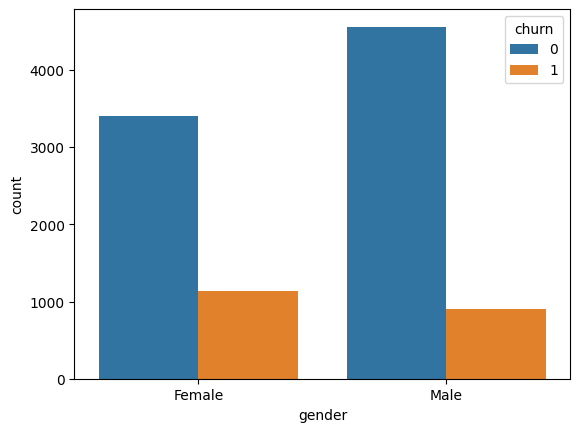

In [15]:
#Churn rate by gender

sns.countplot(x='gender', hue='churn', data=df)

<Axes: xlabel='country', ylabel='count'>

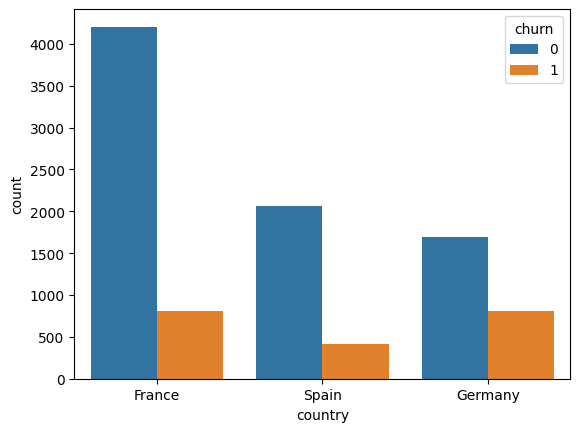

In [16]:
#churn by country

sns.countplot(x='country', hue='churn', data=df)

In [17]:
# converting the text data into numerical data

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

df =pd.get_dummies(df, columns=['country'], drop_first=True)

In [18]:
df['country_Germany'] = df['country_Germany'].astype(int)
df['country_Spain'] = df['country_Spain'].astype(int)                     #used to covert it into numerical value

In [19]:
df.head()

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [20]:
#dropping customer ID column not equired for modeling
df = df.drop(columns=["customer_id"])

array([[<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'products_number'}>],
       [<Axes: title={'center': 'credit_card'}>,
        <Axes: title={'center': 'active_member'}>,
        <Axes: title={'center': 'estimated_salary'}>],
       [<Axes: title={'center': 'churn'}>,
        <Axes: title={'center': 'country_Germany'}>,
        <Axes: title={'center': 'country_Spain'}>]], dtype=object)

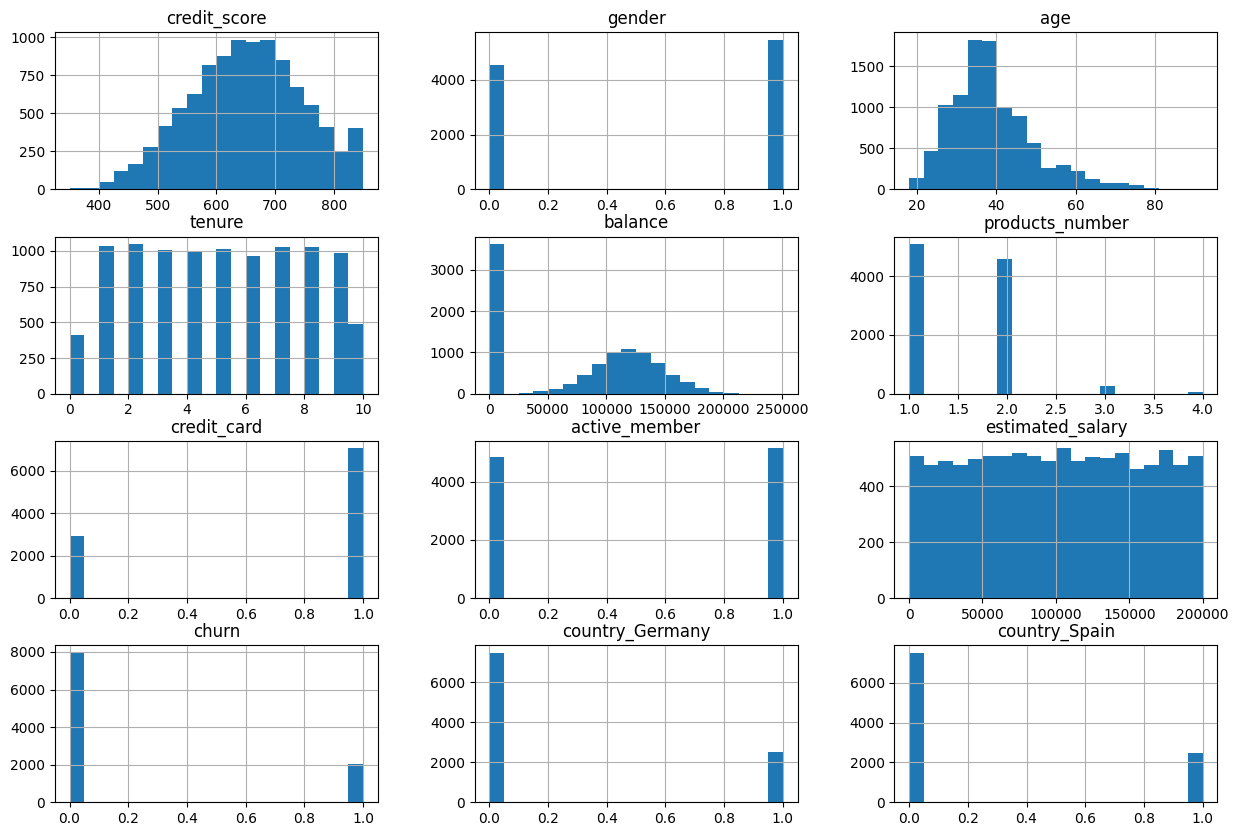

In [21]:
df.hist(bins=20, figsize=(15, 10))

In [22]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [23]:
df.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn',
       'country_Germany', 'country_Spain'],
      dtype='object')

In [24]:
df.head(2)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1


In [25]:
df.describe()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


# Model building

In [26]:
# separate features and target

X = df.drop('churn', axis=1)
Y = df['churn']

In [27]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [28]:
Y_train.shape

(8000,)

In [29]:
Y_train.value_counts()

churn
0    6370
1    1630
Name: count, dtype: int64

In [30]:
# apply the SMOTE to trainig set only

smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [31]:
# Scale features

scaler = StandardScaler()

X_train_scaler =scaler.fit_transform(X_train_smote)
X_test_scaler =scaler.transform(X_test)

In [32]:
# Model training

model = XGBClassifier()

model.fit(X_train_scaler, Y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [40]:
import joblib

# Save the trained model
joblib.dump(model, 'churn_model.pkl')
model = joblib.load('churn_model.pkl')

In [41]:
# make prediction
Y_pred = model.predict(X_test)

In [42]:
Y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [43]:
# Evaluate the MOdel

print("Accuracy:", accuracy_score(Y_test, Y_pred))

print("Classification Report:\n", classification_report(Y_test, Y_pred))

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.431
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.36      0.50      1593
           1       0.22      0.72      0.34       407

    accuracy                           0.43      2000
   macro avg       0.53      0.54      0.42      2000
weighted avg       0.71      0.43      0.47      2000

Confusion Matrix:
 [[ 568 1025]
 [ 113  294]]


In [44]:
#save the Model

with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [45]:
#Predict on new customer
# use anyrow from the data or custom input

new_customer = X_test.iloc[[int(input("inter the input: "))]]


new_prediction = model.predict(new_customer)

print("New Prediction:", "churn" if new_prediction[0] == 1 else "No Churn")


inter the input:  458


New Prediction: churn
